In [1]:
#import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
#link to fetch reviews from
url = "https://www.sitejabber.com/reviews/360digitmg.com"

In [3]:
# Fetch the content of the URL, parse the HTML content using BeautifulSoup and 'html.parser'
soup = BeautifulSoup(requests.get(url).content,'html.parser')

In [4]:
# Find all HTML elements with the class 'review__text' and store them in the 'Reviews' list
Reviews =soup.find_all(class_='review__text')

In [5]:
#view reviews
Reviews

[<div class="review__text" data-rating="5" id="ReviewText-9620967">
 <p lang="en" style="margin-bottom:10px">I joined the training program after one of my friends has been placed in a multinational office. I come from a non-technical background so I was worried that it might be hard for me to understand complicated concepts and especially technical concepts. But trainers here are very friendly and clear doubts very often.</p>
 <div class="review__extra-info">
 <div class="review__extra-info__attributes mb-10">
 <div class="review__extra-info__column">
 <div class="review__extra-info__rating">
 <div class="review__extra-info__rating__stars">
 <div class="stars stars stars-container stars-container--tiny" data-rating="5" data-rating-rounded="5.0" title="5.0 star rating">
 <div class="stars__inner">
 <i aria-hidden="true" class="star"></i>
 <i aria-hidden="true" class="star"></i>
 <i aria-hidden="true" class="star"></i>
 <i aria-hidden="true" class="star"></i>
 <i aria-hidden="true" class

In [6]:
Review360= [] #Initialize an empty list to store cleaned review text
for i in range (0,len(Reviews)): # Loop through each review element
    Review360.append(Reviews[i].get_text().strip()) #Extract text, remove extra spaces, and add to Review360
Review360 #output the final list

['I joined the training program after one of my friends has been placed in a multinational office. I come from a non-technical background so I was worried that it might be hard for me to understand complicated concepts and especially technical concepts. But trainers here are very friendly and clear doubts very often.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nService\n\n\n\n\n\n\n\n\n\n\n\n\n\nValue\n\n\n\n\n\n\n\n\n\n\n\n\n\nReturns\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nQuality',
 "Yes it's a very good quality corporate training organization if students\u200d facing any technical issues while learning this program individual consultants available to resolve our issues to support in every aspect to complete this course and get a placement in MNC companies...\n\nProducts used:Professional program in Data science and artificial intelligence Including IBM project certificate is Best \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nService\n\n\n\n\n\n\n\n\n\n\n\n\n\nValue\n\n\n\n\n\n\n\n\n\n\n\n\n\nReturns\n\n\n\n\n\n\n\n\n\n\

In [7]:
#create a dataframe
df = pd.DataFrame()

In [8]:
#add a column reviews and add above reviews in it
df['reviews']= Review360

In [9]:
#view
df.head(20)

,reviews
0,I joined the training program after one of my ...
1,Yes it's a very good quality corporate trainin...
2,"Guys, Dont take admission in this institute. I..."
3,I come from a statistics background and always...
4,Excellent platform for Data Science and Artifi...
5,The trainers has given great support in making...
6,I joined the course in 2021 and was able to co...
7,Terrific post thoroughly enjoyed reading the b...
8,I have only one word to say about the training...
9,"With being an online course, I was a little sc..."


In [13]:
#install textblob
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 960.0 kB/s eta 0:00:01
   ---------- ----------------------------- 163.8/626.3 kB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 266.2/626.3 kB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00


In [14]:
#import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [15]:
#lower casing 
df['reviews'] = df['reviews'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [16]:
#removing punctuations
df['reviews'] = df['reviews'].str.replace('[^\w\s]',"")

In [17]:
#view
df['reviews'].head()

0    i joined the training program after one of my ...
1    yes it's a very good quality corporate trainin...
2    guys, dont take admission in this institute. i...
3    i come from a statistics background and always...
4    excellent platform for data science and artifi...
Name: reviews, dtype: object

In [19]:
#download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\poona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
#removing stopwords
stop = stopwords.words()

In [21]:
df['reviews'] =df['reviews'].apply(lambda x : str(TextBlob(x).correct()))

In [23]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ---------------------------------------  122.9/126.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [24]:
import seaborn as sns
import re
import os
import sys
import ast
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [27]:
#Generating Sentiment for all the sentence present in the dataset
emptyline=[] 
for row in df['reviews']:
    
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)

In [28]:
#creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.082,0.716,0.202,0.8847
1,0.000,0.721,0.279,0.9633
2,0.102,0.840,0.058,-0.6957
3,0.024,0.826,0.150,0.8620
4,0.000,0.702,0.298,0.9061


In [30]:
#Merging the sentiments back to our df dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c

,reviews,neg,neu,pos,compound
0,i joined the training program after one of my ...,0.082,0.716,0.202,0.8847
1,yes it's a very good quality corporate trainin...,0.000,0.721,0.279,0.9633
2,"guns, dont take admission in this institute. i...",0.102,0.840,0.058,-0.6957
3,i come from a statistics background and always...,0.024,0.826,0.150,0.8620
4,excellent platform for data science and artifi...,0.000,0.702,0.298,0.9061
5,the trainer has given great support in making ...,0.029,0.661,0.310,0.9670
6,i joined the course in 2021 and was able to co...,0.000,0.890,0.110,0.8402
7,terrific post thoroughly enjoyed reading the b...,0.000,0.665,0.335,0.9392
8,i have only one word to say about the training...,0.000,0.814,0.186,0.8805
9,"with being an online course, i was a little sc...",0.078,0.737,0.185,0.8906


In [31]:
#add positive and negative labels
import numpy as np
df_c['sentiment'] = np.where(df_c['compound']>=0, 'Positive', 'Negative')
df_c

,reviews,neg,neu,pos,compound,sentiment
0,i joined the training program after one of my ...,0.082,0.716,0.202,0.8847,Positive
1,yes it's a very good quality corporate trainin...,0.000,0.721,0.279,0.9633,Positive
2,"guns, dont take admission in this institute. i...",0.102,0.840,0.058,-0.6957,Negative
3,i come from a statistics background and always...,0.024,0.826,0.150,0.8620,Positive
4,excellent platform for data science and artifi...,0.000,0.702,0.298,0.9061,Positive
5,the trainer has given great support in making ...,0.029,0.661,0.310,0.9670,Positive
6,i joined the course in 2021 and was able to co...,0.000,0.890,0.110,0.8402,Positive
7,terrific post thoroughly enjoyed reading the b...,0.000,0.665,0.335,0.9392,Positive
8,i have only one word to say about the training...,0.000,0.814,0.186,0.8805,Positive
9,"with being an online course, i was a little sc...",0.078,0.737,0.185,0.8906,Positive


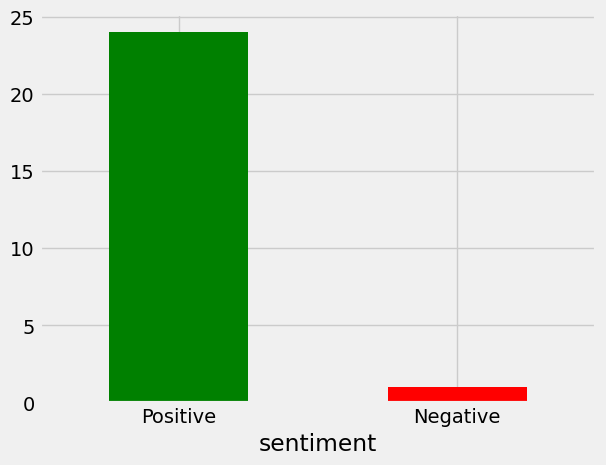

In [32]:
#plotting the negative and positive sentiment count
result =df_c['sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['Green','Red']);

In [33]:
df1=df["reviews"]

In [34]:
df1.to_csv(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\360Reviews.csv",index=False, header=False)

In [38]:
with open(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\360Reviews.txt","r") as rc:
    review = rc.read()

In [42]:
#convert above csv to txt file

# Read the CSV file
df = pd.read_csv(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\360Reviews.csv")

# Convert the DataFrame to a string
data_as_string = df.to_string(index=False)

# Write the string to a text file
with open(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\360Reviews.txt", "w",encoding="utf-8") as txt_file:
    txt_file.write(data_as_string)

In [44]:
#open the above created txt file
with open(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\360Reviews.txt","r", encoding="utf-8") as rc:
    review = rc.read()

In [45]:
review = review.split("\n")

In [46]:
review_string = " ".join(review)

In [48]:
#install word cloud
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/300.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [49]:
#import libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

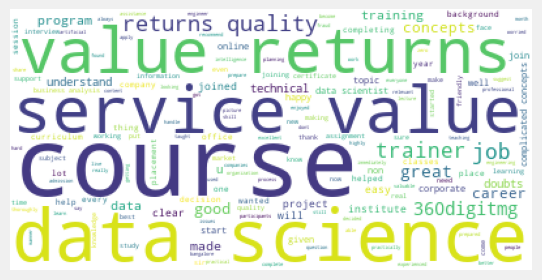

In [88]:
#wordcloud for frequently occuring words in the review
wordcloud = WordCloud(background_color ='white').generate(review_string)
plt.figure(figsize=(6,6))
plt.imshow (wordcloud)
plt.axis("off")
plt.show()

In [51]:
watch_reviews_words = review_string.split(" ")

In [63]:
# positive words 
#Choose the path for +ve words stored in system 
#one can download positive and negative word file from internet  or 
#you can also create file of your own positive and negative words 

with open(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

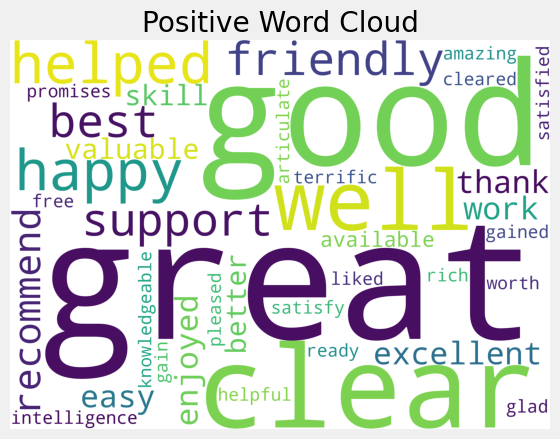

In [93]:
# Positive word cloud
# Choosing the only words which are present in positive words
watch_pos_in_pos = " ".join ([w for w in watch_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(watch_pos_in_pos)
plt.figure(2)
plt.axis("off")
plt.title('Positive Word Cloud')
plt.imshow(wordcloud_pos_in_pos)

In [52]:
# negative words # Choose the path for +ve words stored in system
with open(r"E:\DATA SCIENCE PROJECTS\TEXT MINING\PROJECT 1\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

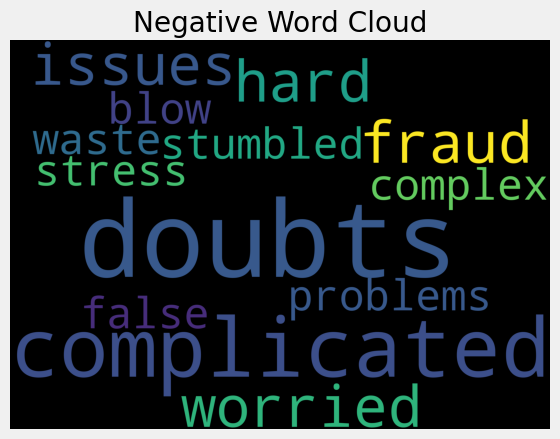

In [94]:
# negative word cloud
# Choosing the only words which are present in negwords
watch_neg_in_neg = " ".join ([w for w in watch_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=2500,
                      height=1800
                     ).generate(watch_neg_in_neg)
plt.figure(3)
plt.axis("off")
plt.title('Negative Word Cloud')
plt.imshow(wordcloud_neg_in_neg)

In [54]:
# wordcloud with bigram
import nltk
text = review_string

In [55]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [59]:
# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [60]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)

In [61]:
# Remove stop words
text_content = [word for word in text_content if word not in stopwords_wc]

In [62]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

In [66]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\poona\AppData\Roaming\nltk_data...


True

In [67]:
WNL = nltk.WordNetLemmatizer()
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [68]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('joined', 'training'), ('training', 'program'), ('program', 'one'), ('one', 'friend'), ('friend', 'placed'), ('placed', 'multinational'), ('multinational', 'office'), ('office', 'come'), ('come', 'nontechnical'), ('nontechnical', 'background'), ('background', 'worried'), ('worried', 'might'), ('might', 'hard'), ('hard', 'understand'), ('understand', 'complicated'), ('complicated', 'concept'), ('concept', 'especially'), ('especially', 'technical'), ('technical', 'concept'), ('concept', 'trainer'), ('trainer', 'friendly'), ('friendly', 'clear'), ('clear', 'doubt'), ('doubt', 'often'), ('often', 'service'), ('service', 'value'), ('value', 'return'), ('return', 'quality'), ('quality', 'yes'), ('yes', 'good'), ('good', 'quality'), ('quality', 'corporate'), ('corporate', 'training'), ('training', 'organization'), ('organization', 'students\u200d'), ('students\u200d', 'facing'), ('facing', 'technical'), ('technical', 'issue'), ('issue', 'learning'), ('learning', 'program'), ('program', 'ind

In [69]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['joined training', 'training program', 'program one', 'one friend', 'friend placed', 'placed multinational', 'multinational office', 'office come', 'come nontechnical', 'nontechnical background', 'background worried', 'worried might', 'might hard', 'hard understand', 'understand complicated', 'complicated concept', 'concept especially', 'especially technical', 'technical concept', 'concept trainer', 'trainer friendly', 'friendly clear', 'clear doubt', 'doubt often', 'often service', 'service value', 'value return', 'return quality', 'quality yes', 'yes good', 'good quality', 'quality corporate', 'corporate training', 'training organization', 'organization students\u200d', 'students\u200d facing', 'facing technical', 'technical issue', 'issue learning', 'learning program', 'program individual', 'individual consultant', 'consultant available', 'available resolve', 'resolve issue', 'issue support', 'support every', 'every aspect', 'aspect complete', 'complete course', 'course placement',

In [70]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'joined training': 385,
 'training program': 721,
 'program one': 530,
 'one friend': 472,
 'friend placed': 268,
 'placed multinational': 500,
 'multinational office': 449,
 'office come': 467,
 'come nontechnical': 108,
 'nontechnical background': 461,
 'background worried': 61,
 'worried might': 771,
 'might hard': 443,
 'hard understand': 318,
 'understand complicated': 725,
 'complicated concept': 124,
 'concept especially': 128,
 'especially technical': 235,
 'technical concept': 670,
 'concept trainer': 133,
 'trainer friendly': 703,
 'friendly clear': 269,
 'clear doubt': 102,
 'doubt often': 213,
 'often service': 470,
 'service value': 611,
 'value return': 741,
 'return quality': 586,
 'quality yes': 562,
 'yes good': 778,
 'good quality': 289,
 'quality corporate': 550,
 'corporate training': 141,
 'training organization': 719,
 'organization students': 483,
 'students facing': 644,
 'facing technical': 255,
 'technical issue': 671,
 'issue learning': 362,
 'learning progr

In [71]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('data science', 19), ('service value', 17), ('value return', 17), ('return quality', 17), ('science course', 6), ('complicated concept', 5), ('data scientist', 5), ('clear doubt', 4), ('concept easy', 4), ('training program', 3), ('completing course', 3), ('concept great', 3), ('great place', 3), ('joined course', 3), ('made sure', 3), ('start career', 3), ('business analysis', 3), ('nontechnical background', 2), ('good quality', 2), ('science artificial', 2), ('artificial intelligence', 2), ('always wanted', 2), ('course helped', 2), ('corporate company', 2), ('course service', 2), ('background trainer', 2), ('support making', 2), ('making complicated', 2), ('easy understand', 2), ('clear picture', 2), ('picture handle', 2), ('handle real', 2), ('real project', 2), ('project job', 2), ('doubt concept', 2), ('place prepare', 2), ('prepare career', 2), ('career service', 2), ('quality joined', 2), ('project assignment', 2), ('job service', 2), ('live project', 2), ('understand topic',

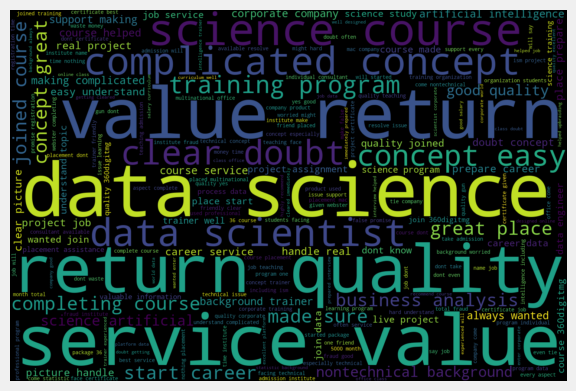

In [73]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
#plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()